<h1> Question 1 - Importation of tweeets</h1>

In [342]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np
import csv
import time
import matplotlib.pyplot as plt
from datetime import date, timedelta
import statsmodels.api as sm
from pyramid.arima import auto_arima
import pandas_datareader
from statsmodels.tsa.stattools import acf, pacf

#API for text analysis https://developer.aylien.com
from aylienapiclient import textapi

In [ ]:
#We are limited by the free API of text analysis so we analyse only tweets of the 3 last months
with open("data/trump.csv", 'w', encoding="utf-8") as f:
    # Wrap the file object by the writer.
    writer = csv.writer(f)
    
    # Write the header line to the output if needed.
    writer.writerow(['Date', 'tweet'])
    
    start = date(2019, 4, 1)
    end = date(2019, 5, 29)
    day = timedelta(days=1)

    mydate = start
    
    while mydate < end:
        #print("{date.day:02}{date.month:02}{date.year}".format(date=mydate))
        
        tweetCriteria = got.manager.TweetCriteria().setUsername("realDonaldTrump")\
                                           .setSince(("{date.year}-{date.month:02}-{date.day:02}".format(date=mydate)))\
                                           .setUntil(("{date.year}-{date.month:02}-{date.day:02}".format(date=mydate+day)))\
                                           .setTopTweets(True)\
                                           .setMaxTweets(240)
        
        mydate = mydate + day
        
    
        # Loop through the dictionary and get the tuples.
        # You may want to sort it somehow. Not shown here.
        for tweets in got.manager.TweetManager.getTweets(tweetCriteria):
            #writer.writerow(t)

            writer.writerow([tweets.date, tweets.text])

In [291]:
df = pd.read_csv("data/trump.csv")
df.head()

,Date,tweet
0,2019-04-01 16:47:16+00:00,Democrats should stop fighting Sen. David Perd...
1,2019-04-01 14:43:14+00:00,No matter what information is given to the cra...
2,2019-04-01 13:41:23+00:00,The cost of ObamaCare is far too high for our ...
3,2019-04-01 13:03:28+00:00,Can you believe that the Radical Left Democrat...
4,2019-04-01 12:13:29+00:00,"Democrats, working with Republicans in Congres..."


In [292]:
df.shape

(658, 2)

<h1> Question 2 - Creation of a daily sentiment time serie</h1>

In [12]:
#Test of the API
client = textapi.Client("f4b7ab05", "bd00d1ce1dffc51dff21d2bfbeef6f37")
s = client.Sentiment({'text': 'The tree is green'})
s

{'polarity': 'neutral',
 'subjectivity': 'subjective',
 'text': 'The tree is green',
 'polarity_confidence': 0.6618327498435974,
 'subjectivity_confidence': 0.9879279463194073}

In [151]:
#A tweet from Donald Trump
print(client.Sentiment({'text': 'Nothing changes from the Mueller Report. There was insufficient evidence and therefore, in our Country, a person is innocent. The case is closed! Thank you.'}))

{'polarity': 'negative',
 'subjectivity': 'subjective',
 'text': 'Nothing changes from the Mueller Report. There was insufficient evidence and therefore, in our Country, a person is innocent. The case is closed! Thank you.',
 'polarity_confidence': 0.8088650703430176,
 'subjectivity_confidence': 1.0}

In [133]:
print(client.Sentiment({'text': 'Just arrived in Colorado. Getting ready to deliver the commencement speech at the Air Force Academy graduation. Very exciting - probably will be broadcast live on TV. They want good ratings!'}))

{'polarity': 'positive',
 'subjectivity': 'subjective',
 'text': 'Just arrived in Colorado. Getting ready to deliver the commencement speech at the Air Force Academy graduation. Very exciting - probably will be broadcast live on TV. They want good ratings!',
 'polarity_confidence': 0.9619194269180298,
 'subjectivity_confidence': 1.0}

In [45]:
#Calls of the API are limited for freee users
client = textapi.Client("f4b7ab05", "bd00d1ce1dffc51dff21d2bfbeef6f37")

<p>The API is limited by 1000 calls by day and 60 calls by minute because we use a free version so it is impossible to study a big amount of data like it is ask in the subject. We have to cut the dataframe in different dataframe of 60 lines and wait 60 secondes between 2 calls of the API. That's why we will study only tweets of Donald Trump too.</p>

In [ ]:
df1 = df[0:60]
df2 = df[60:120]
df3 = df[120:180]
df4 = df[180:240]
df5 = df[240:300]
df6 = df[300:360]
df7 = df[360:420]
df8 = df[420:480]
df9 = df[480:540]
df10 = df[540:600]
df11 = df[600:660]

In [ ]:
#We call the Sentiment API to analyse tweets
df1['polarity'] = df1['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df2['polarity'] = df2['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df3['polarity'] = df3['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df4['polarity'] = df4['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df5['polarity'] = df5['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df6['polarity'] = df6['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df7['polarity'] = df7['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df8['polarity'] = df8['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df9['polarity'] = df9['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df10['polarity'] = df10['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])
time.sleep(60)
df11['polarity'] = df11['tweet'].apply(lambda x: client.Sentiment({'text': x})['polarity'])

In [295]:
#It returns one polarity value for each tweet that can be  'positive', 'negative' or 'neutral'
df1.head()

,Date,tweet,polarity
0,2019-04-01 16:47:16+00:00,Democrats should stop fighting Sen. David Perd...,negative
1,2019-04-01 14:43:14+00:00,No matter what information is given to the cra...,negative
2,2019-04-01 13:41:23+00:00,The cost of ObamaCare is far too high for our ...,positive
3,2019-04-01 13:03:28+00:00,Can you believe that the Radical Left Democrat...,negative
4,2019-04-01 12:13:29+00:00,"Democrats, working with Republicans in Congres...",negative


In [297]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])

In [298]:
#We convert polarity in -1,0 and 1 values
df['sentiment'] = (np.select(
        condlist=[df['polarity'] == 'positive', df['polarity'] == 'negative'], 
        choicelist=[1, -1], 
        default= 0))
df.head()

,Date,tweet,polarity,sentiment
0,2019-04-01 16:47:16+00:00,Democrats should stop fighting Sen. David Perd...,negative,-1
1,2019-04-01 14:43:14+00:00,No matter what information is given to the cra...,negative,-1
2,2019-04-01 13:41:23+00:00,The cost of ObamaCare is far too high for our ...,positive,1
3,2019-04-01 13:03:28+00:00,Can you believe that the Radical Left Democrat...,negative,-1
4,2019-04-01 12:13:29+00:00,"Democrats, working with Republicans in Congres...",negative,-1


In [299]:
df['Date'] = df['Date'].apply(lambda x: x[:10])
df.head()

,Date,tweet,polarity,sentiment
0,2019-04-01,Democrats should stop fighting Sen. David Perd...,negative,-1
1,2019-04-01,No matter what information is given to the cra...,negative,-1
2,2019-04-01,The cost of ObamaCare is far too high for our ...,positive,1
3,2019-04-01,Can you believe that the Radical Left Democrat...,negative,-1
4,2019-04-01,"Democrats, working with Republicans in Congres...",negative,-1


In [302]:
df.to_csv('df.csv')

In [303]:
df.drop(['tweet', 'polarity'], axis='columns', inplace=True)
df.head()

,Date,sentiment
0,2019-04-01,-1
1,2019-04-01,-1
2,2019-04-01,1
3,2019-04-01,-1
4,2019-04-01,-1


In [306]:
#We group tweets by date and do the mean for each day to get a time serie
sentimentTimeserie = df.groupby('Date').mean()
sentimentTimeserie.head()

,sentiment
Date,
2019-04-01,-0.666667
2019-04-02,-0.058824
2019-04-03,0.500000
2019-04-04,0.100000
2019-04-05,0.062500


<h1> Question 3 - Properties of the sentiment index time series</h1>

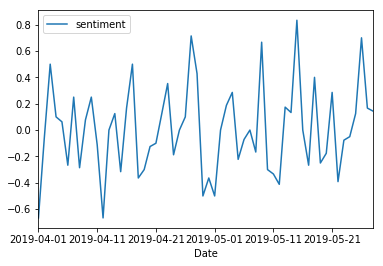

In [307]:
sentimentTimeserie.plot()

In [308]:
sentimentTimeserie['sentiment'].describe()

count    58.000000
mean      0.005596
std       0.337203
min      -0.666667
25%      -0.262500
50%       0.000000
75%       0.172101
max       0.833333
Name: sentiment, dtype: float64

In [309]:
#We calculate acf and pacf
acf = acf(sentimentTimeserie)
pacf = pacf(sentimentTimeserie)

C:\Users\Hugo\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


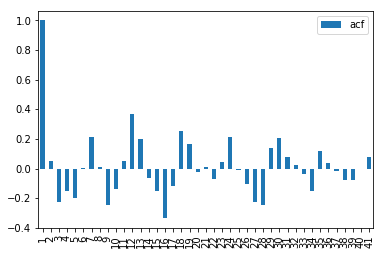

In [313]:
#Then we plot them
test_df = pd.DataFrame([acf]).T
test_df.columns = ['acf']
test_df.index += 1
test_df.plot(kind='bar')

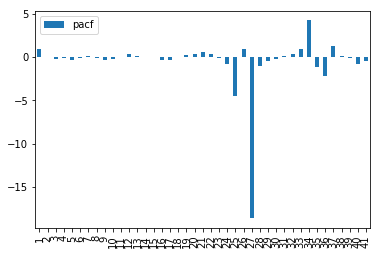

In [312]:
test_df = pd.DataFrame([pacf]).T
test_df.columns = ['pacf']
test_df.index += 1
test_df.plot(kind='bar')

In [368]:
train = sentimentTimeserie[:45]
valid = sentimentTimeserie[45:58]

In [366]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=30.944, BIC=41.784, Fit time=0.171 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=35.954, BIC=39.567, Fit time=0.017 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=37.631, BIC=43.051, Fit time=0.033 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=37.314, BIC=42.734, Fit time=0.041 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=32.675, BIC=45.322, Fit time=0.196 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=31.108, BIC=43.754, Fit time=0.208 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=32.460, BIC=39.686, Fit time=0.208 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=31.740, BIC=46.193, Fit time=

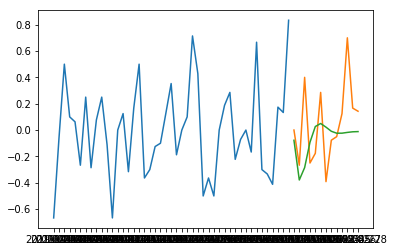

In [369]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

<p>Our model doesn not fit well. I think that we have not enough data to do a good ARIMA model</p>

<h1> Question 4 - Comparison bewtween tweets and S&P 500</h1>

In [317]:
start_date = '2019-04-01'
end_date = '2019-05-28'
stockSP500 = pandas_datareader.data.DataReader('^GSPC', 'yahoo', start = start_date,end = end_date)
stockSP500["Log"] = np.log(stockSP500["Adj Close"])
stockSP500["Returns"] = stockSP500["Log"].diff()
stockSP500["Returns"][0] = stockSP500["Returns"][1]
stockSP500.head()

C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,High,Low,Open,Close,Volume,Adj Close,Log,Returns
Date,,,,,,,,
2019-04-01,2869.399902,2848.629883,2848.629883,2867.189941,3500760000,2867.189941,7.961088,0.000017
2019-04-02,2872.899902,2858.750000,2868.239990,2867.239990,3246900000,2867.239990,7.961105,0.000017
2019-04-03,2885.250000,2865.169922,2876.090088,2873.399902,3550240000,2873.399902,7.963251,0.002146
2019-04-04,2881.280029,2867.139893,2873.989990,2879.389893,3015180000,2879.389893,7.965334,0.002082
2019-04-05,2893.239990,2882.989990,2884.159912,2892.739990,3146820000,2892.739990,7.969959,0.004626


In [318]:
stockSP500.drop(['High', 'Low','Open', 'Close', 'Volume', 'Adj Close', 'Log'], axis='columns', inplace=True)
stockSP500.head()

,Returns
Date,
2019-04-01,0.000017
2019-04-02,0.000017
2019-04-03,0.002146
2019-04-04,0.002082
2019-04-05,0.004626


In [324]:
#We join data from the two dataframe
dfSentimentReturn = sentimentTimeserie.join(stockSP500)
dfSentimentReturn.head()

,sentiment,Returns
Date,,
2019-04-01,-0.666667,0.000017
2019-04-02,-0.058824,0.000017
2019-04-03,0.500000,0.002146
2019-04-04,0.100000,0.002082
2019-04-05,0.062500,0.004626


In [327]:
#We drop data from days when S&P500 is not open
dfSentimentReturn = dfSentimentReturn.dropna()

Text(0.5, 1.0, "Sentiment index of Donald Trump's tweets")

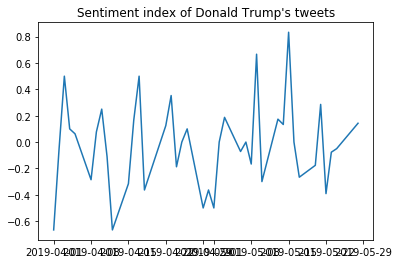

In [334]:
plt.plot(dfSentimentReturn['sentiment'])
plt.title("Sentiment index of Donald Trump's tweets")

Text(0.5, 1.0, 'Log returns of the S&P500')

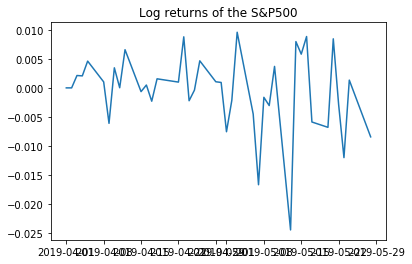

In [335]:
plt.plot(dfSentimentReturn['Returns'])
plt.title("Log returns of the S&P500")

<p>We don't see a coorelation between them with only plots</p>

<h1> Question 5 - Test for Granger causality</h1>

In [336]:
from statsmodels.tsa.stattools import grangercausalitytests


In [340]:
grangercausalitytests(dfSentimentReturn,5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3791  , p=0.5419  , df_denom=36, df_num=1
ssr based chi2 test:   chi2=0.4107  , p=0.5216  , df=1
likelihood ratio test: chi2=0.4086  , p=0.5227  , df=1
parameter F test:         F=0.3791  , p=0.5419  , df_denom=36, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7351  , p=0.0156  , df_denom=33, df_num=2
ssr based chi2 test:   chi2=10.9051 , p=0.0043  , df=2
likelihood ratio test: chi2=9.5872  , p=0.0083  , df=2
parameter F test:         F=4.7351  , p=0.0156  , df_denom=33, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1477  , p=0.0395  , df_denom=30, df_num=3
ssr based chi2 test:   chi2=11.6466 , p=0.0087  , df=3
likelihood ratio test: chi2=10.1255 , p=0.0175  , df=3
parameter F test:         F=3.1477  , p=0.0395  , df_denom=30, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7935  , p=0.1593  , df_d

{1: ({'ssr_ftest': (0.3791267091773306, 0.5419445709636164, 36.0, 1),
   'ssr_chi2test': (0.4107206016087749, 0.5216039828920283, 1),
   'lrtest': (0.4085729563593077, 0.5226947063844996, 1),
   'params_ftest': (0.3791267091773294, 0.5419445709636164, 36.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.735119493937945, 0.01556260798515557, 33.0, 2),
   'ssr_chi2test': (10.9051236830086, 0.004285312325441231, 2),
   'lrtest': (9.58724838224802, 0.008282385972842836, 2),
   'params_ftest': (4.735119493937944, 0.01556260798515557, 33.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.1477188633808737, 0.03945248448462508, 30.0, 3),
   'ssr_chi2test': (11.646559794509233, 0.008697379580597431, 3),
   'lrtest': (10.125537664316198, 0.017528614718197954, 3),
   'params_ftest': (3.1477188633808755, 0.03945248448462497, 30.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

<p>The Null hypothesis for grangercausalitytests is that the time series in the second column  does NOT Granger cause the time series in the first column.</p>
<p>So we see that the p value is higher than 0.05 for a lag equal to 1 and we can consider that there is a granger causality between the two series</p>